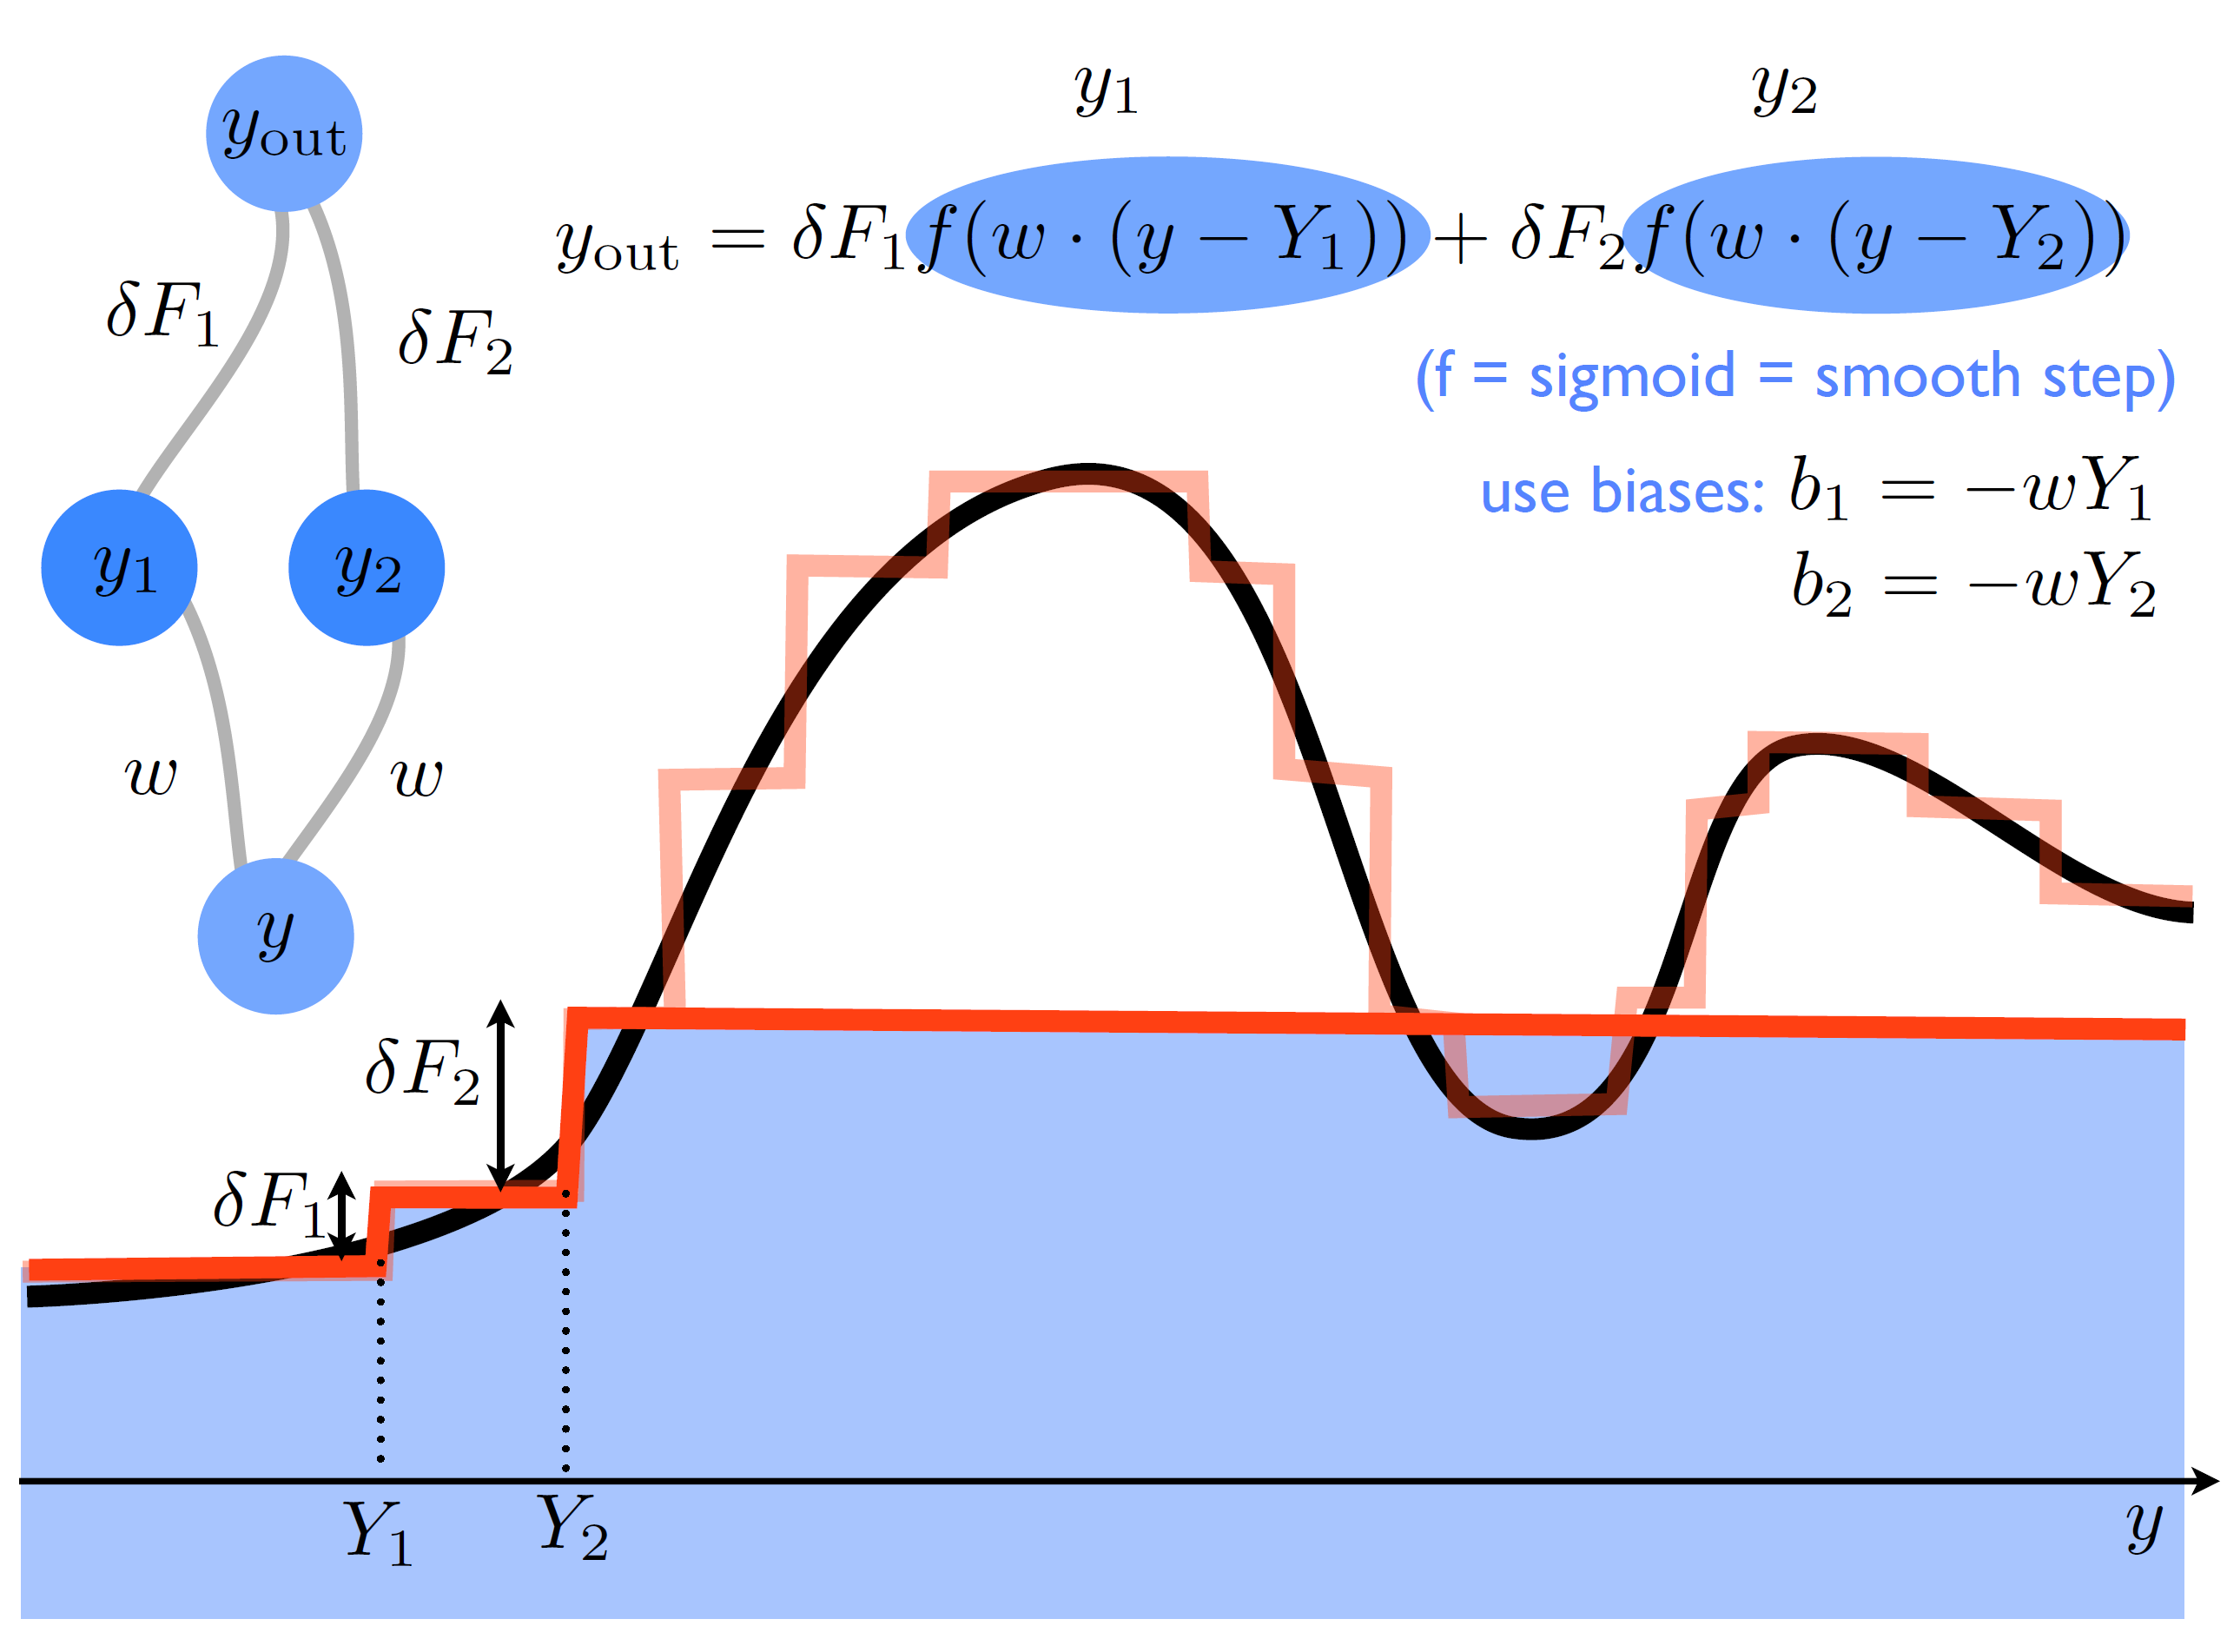

# Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define the function to approximate

In [3]:
def f(x):
    return np.cos(x)**2

# Define the network

Define the number of points to sample from the function (number of neurons) and the approximation window (from `x_start` to `x_end`)

In [4]:
N = 40

x_start = 0
x_end = 2*np.pi

Evaluate the function in `N` points. We will use them to calculate the optimal weights and biases of the neural network.

In [42]:
x_steps = np.linspace(x_start,x_end,N)
f_steps = f(x_steps)
x_steps = x_steps[:-1]

In [55]:
roughness = 75 # roughness - the higher the steepest
weights_0 = roughness*np.ones(N-1) # weights between input and hidden layer, omega in the picture
biases_0 = -weights_0*x_steps

weights_2 = f_steps[1:]-f_steps[:-1] # weights between hidden layer and output, delta_F in the picture
biases_1 = f_steps[0] # needed for the starting point of the function

In [70]:
# Activation function
def step(z):
    z[z<0], z[z>0] = 0,1
    return z

# First layer
def apply_0(x_in):
    return sigmoid(weights_0*x_in + biases_0)

# Second layer
def apply_1(x_in):
    return np.dot(x_in, weights_1) + biases_1

def apply_net(x_in):
    x_column=x_in.reshape([-1,1]) # we need the right shape for the product with weights_0
    y_0 = apply_0(x_column)
    y_1 = apply_1(y_0)
    return y_1

# Evaluate the model and plot the results

Sample the function in `M` values and compare the output of the network with the real values

In [71]:
M = 1000
x_in = np.linspace(x_start,x_end,M)

y_out = apply_net(x_in)
f_out = f(x_in)

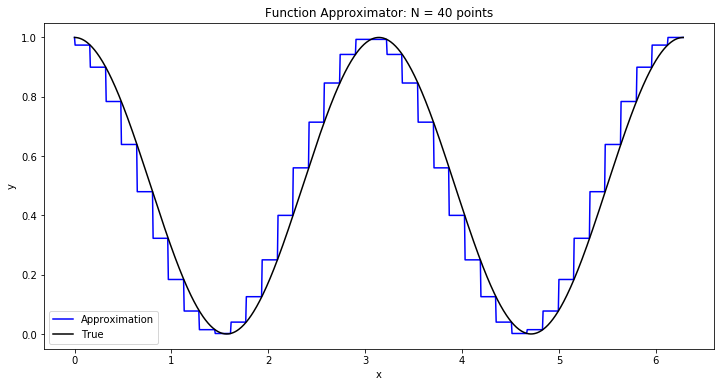

In [72]:
plt.figure(figsize=[12,6])
plt.plot(x_in, y_out, label="Approximation", c="blue")
plt.plot(x_in, f_out, label="True", c="black")
plt.title("Function Approximator: N = " + str(N) + " points" )
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Cost function
How much the output of the network is different from the correct values.

In [73]:
cost = np.sum((y_out-f_out)**2)
print("Mean squared error: %1.5f" % cost)

Mean squared error: 4.27994


Increasing the number of neurons `N` will lead to a better approximation. Try changing the `roughness` parameter and using a `tanh` activation function.

##  Why `relu` does not work?

In this model, the optimal output is the one with a step activation function (i.e. the neuron $n$ is activated to $1$ when $x_{\text{in}} > x_{\text{step,}n}$ and is $0$ otherwise).
If we used a `relu` activation function,

`
def relu(z):
    z[z<0] = 0
    return z
`

the output of the first layer would not be either $0$ or $1$, but it would be linearly proportional to the input of the neuron. This invalidates the argument we used to choose the weights of the network. 